In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
import pandas as pd
import csv
import glob
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def load_data(path):
    def func(x):
        """Extracts input size from file name"""
        v = x.split(".")[-2].split("-")[-1]
        return int(v)
    
    data = {}

    for filename in glob.iglob(path):
        # extract name
        name = filename.replace("../", "").split(".")[0]

        # read file
        df = pd.read_csv(filename, index_col="Filename")

        # make column names lower-case and remove spaces
        df = df.rename(columns=lambda x: x.strip().lower())    

        # add encoding and message (tyencodepe) columns
        df['format'] = np.where(df.index.str.endswith(".ber"), 'BER', 'XML')
        df['message'] = np.where(df.index.str.contains("data-request"), 'data-request', 'data-response')

        # drop total
        df = df.drop(axis=1, columns=['total'])

        # rename average to the name of this data set
        df = df.rename(columns={"average": name})

        # create input-size parameter
        df['input-size'] = df.index.map(func)

        # save df
        data[name] = df
    
    return data

data = load_data("../*.csv")

# Encoding

In [4]:
encode_xml = data["encode-c"][data["encode-c"]["format"] == 'XML'].sort_values(
    by='input-size'
).drop(['bytes', 'format'], axis=1
      ).rename(columns={'encode-c': 'encode-c-xml'})

encoding = pd.merge(data["encode-python"], data["encode-c"], how='inner').drop(['bytes', 'format'], axis=1)
encoding = pd.merge(encoding, encode_xml, on=['message', 'input-size'], how='inner')
encoding = pd.merge(encoding, data["encode-java"], on=['message', 'input-size'], how='inner').drop(['format', 'bytes'], axis=1)
# encoding = pd.merge(encoding, data["encode-java10"], on=['message', 'input-size'], how='inner').drop(['format', 'bytes'], axis=1)

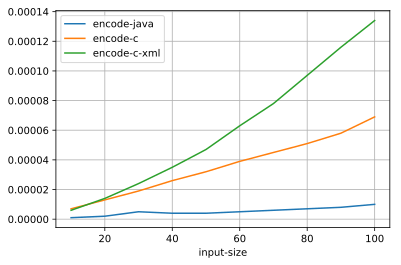

In [5]:
encoding[encoding['message'] == 'data-request'].sort_values(
    by='input-size'
).plot(
    x='input-size',
    y=[# 'encode-python',
        'encode-java', 'encode-c', 'encode-c-xml'
    ],
    grid=True
)

,encode-python,message,input-size,encode-c,encode-c-xml,encode-java
11,0.003650,data-response,100,0.000060,0.000027,0.000010
12,0.007212,data-response,200,0.000119,0.000053,0.000017
13,0.010816,data-response,300,0.000178,0.000079,0.000025
14,0.015200,data-response,400,0.000239,0.000105,0.000036
15,0.018738,data-response,500,0.000296,0.000131,0.000042
16,0.022748,data-response,600,0.000356,0.000158,0.000054
17,0.025941,data-response,700,0.000415,0.000182,0.000060
18,0.030340,data-response,800,0.000475,0.000208,0.000075
19,0.034202,data-response,900,0.000538,0.000236,0.000076
10,0.038100,data-response,1000,0.000602,0.000265,0.000085


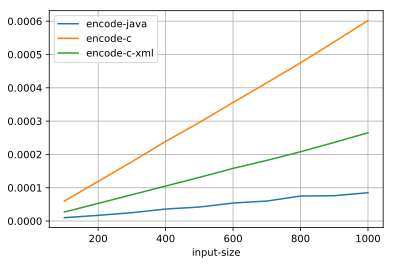

In [6]:
encoding[encoding['message'] == 'data-response'].sort_values(by='input-size').plot(
    x='input-size',
    y=['encode-java', 'encode-c', 'encode-c-xml', #'encode-python'
      ],
    grid=True
)
encoding[encoding['message'] == 'data-response'].sort_values(by='input-size')

# Decoding

In [7]:
decode_xml = data["decode-c"][data["decode-c"]["format"] == 'XML'].sort_values(
    by='input-size'
).drop(['bytes', 'format'], axis=1
      ).rename(columns={'decode-c': 'decode-c-xml'})

decoding = pd.merge(data["decode-python"], data["decode-c"], how='inner').drop(['bytes', 'format'], axis=1)
decoding = pd.merge(decoding, decode_xml, on=['message', 'input-size'], how='inner')
decoding = pd.merge(decoding, data["decode-java"], on=['message', 'input-size'], how='inner').drop(['format', 'bytes'], axis=1)
# decoding = pd.merge(decoding, data["decode-java10"], on=['message', 'input-size'], how='inner').drop(['format', 'bytes'], axis=1)

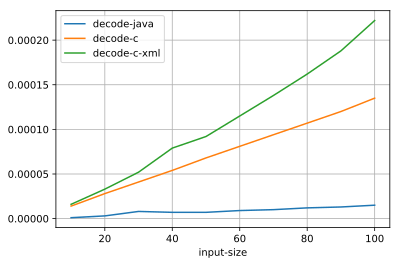

In [8]:
decoding[decoding['message'] == 'data-request'].sort_values(
    by='input-size'
).plot(
    x='input-size',
    y=[#'decode-python',
        'decode-java', 'decode-c', 'decode-c-xml'],
    grid=True
)

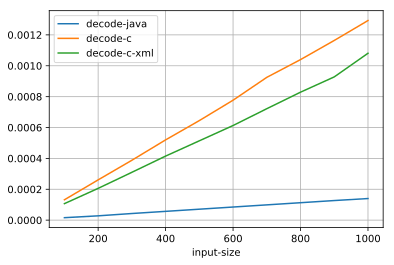

In [9]:
decoding[decoding['message'] == 'data-response'].sort_values(by='input-size').plot(
    x='input-size',
    y=['decode-java', 'decode-c', 'decode-c-xml', 
       #'decode-python'
      ],
    grid=True
)

## Message sizes

In [10]:
df = data["encode-c"].reset_index()
df = df.drop(['Filename', 'encode-c'], axis=1).sort_values(by=['message', 'input-size'])
ber = df[df["format"] == 'BER'].rename(columns={'bytes': 'BER size'}).drop('format', axis=1)
xml = df[df["format"] == 'XML'].rename(columns={'bytes': 'XML size'}).drop('format', axis=1)
sizes = pd.merge(ber, xml, on=['message', 'input-size'], how='inner')

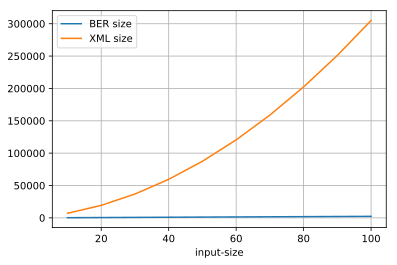

In [11]:
sizes[sizes["message"] == 'data-request'].plot(
    x='input-size',
    y=['BER size', 'XML size'],
    grid=True, # logy=True
)

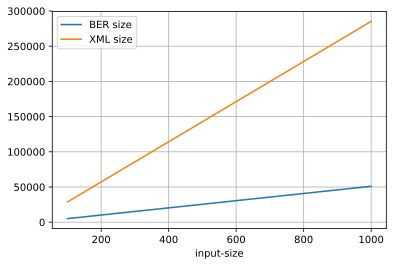

In [12]:
sizes[sizes["message"] == 'data-response'].plot(
    x='input-size',
    y=['BER size', 'XML size'],
    grid=True, # logy=True
)

In [13]:
data["encode-c"][data["encode-c"]["message"] == 'data-response'].sort_values(
    by=['message', 'input-size', 'format'])

,encode-c,bytes,format,message,input-size
Filename,,,,,
../message-data-response-100.ber,0.000060,5131,BER,data-response,100
../message-data-response-100.xml,0.000027,28808,XML,data-response,100
../message-data-response-200.ber,0.000119,10231,BER,data-response,200
../message-data-response-200.xml,0.000053,57308,XML,data-response,200
../message-data-response-300.ber,0.000178,15331,BER,data-response,300
../message-data-response-300.xml,0.000079,85808,XML,data-response,300
../message-data-response-400.ber,0.000239,20431,BER,data-response,400
../message-data-response-400.xml,0.000105,114308,XML,data-response,400
../message-data-response-500.ber,0.000296,25531,BER,data-response,500
